<a href="https://colab.research.google.com/github/Shailendra079/LGMVIP--DataScience_intern_projects/blob/main/Decision_Tree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.xlsx to Iris (1).xlsx


In [ ]:
data = pd.read_excel('Iris.xlsx' )
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data['Species']=data['Species'].map({ 'Iris-setosa' : 0 , 'Iris-versicolor':1, 'Iris-virginica':2})

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


Declare feature vector and target variable

In [ ]:
X = data.drop( data[['Id','Species']],axis=1)
y = data['Species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [ ]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [ ]:
x_train.dtypes,x_test.dtypes

(SepalLengthCm    float64
 SepalWidthCm     float64
 PetalLengthCm    float64
 PetalWidthCm     float64
 dtype: object, SepalLengthCm    float64
 SepalWidthCm     float64
 PetalLengthCm    float64
 PetalWidthCm     float64
 dtype: object)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [ ]:
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9333


In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9667


Checking  overfitting and underfitting

In [ ]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9667
Test set score: 0.9333


[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.25, 0.375, 'X[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'X[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.625, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.875, 0.125, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

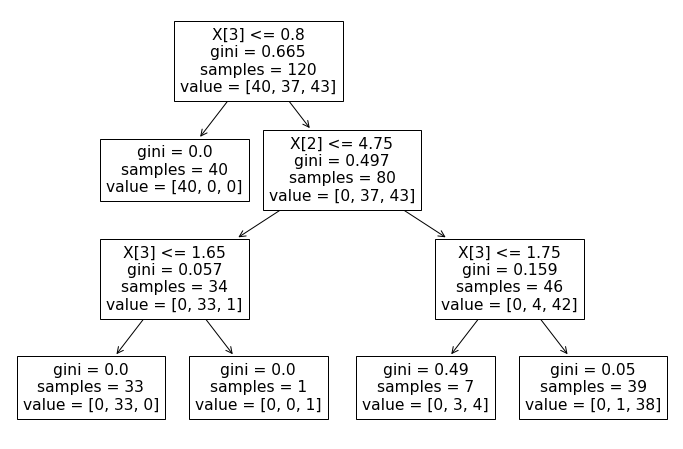

In [ ]:

from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train))

Decision tree with entropy criterion

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9333


In [ ]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9667


By Gini coefficient and Entropy criterion we get the same accuracy score for train and test .

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30

